<a href="https://colab.research.google.com/github/kKawsarAlam/Classification-Algorithms/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression:**     

Logistic Regression is a supervised machine learning algorithm used for classification, predicting the probability of a categorical outcome (like Yes/No, Spam/Not Spam) by fitting an S-shaped curve (sigmoid function) to the data, mapping input variables to a probability between 0 and 1, which is then used to classify the result.    

Sigmoid function: 1/1+e^-y  
here, y = mx + b (leniar function)  

**Types of Logistic Regression**  
Binary: Two possible outcomes (e.g., yes or no, spam or not spam).  
Multinomial: More than two unordered categories (e.g., predicting red, blue, or green).  
Ordinal: Ordered categories (e.g., ratings 1 to 5).  




**Hand Writing Digit Prediction**

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
# Loads a built-in handwritten digits dataset
digits = load_digits()

In [3]:
# Shows all attributes of the dataset object.
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# 8x8 image (64 pixel)
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

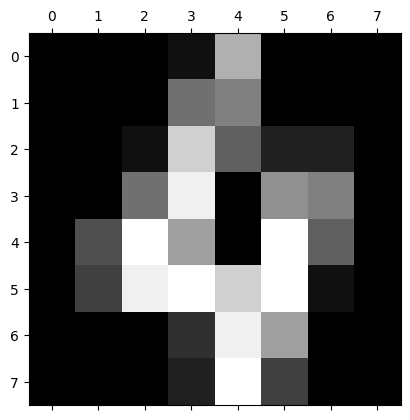

In [5]:
# plt.gray() → shows image in grayscale
# matshow() → visualizes the 8×8 digit
plt.gray()
plt.matshow(digits.images[4])

In [6]:
# Shows the true digit labels for the first 5 images.
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [7]:
# Split Data into Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [8]:
# Training and test size
print(len(x_train))
print(len(x_test))

1437
360


In [9]:
# Create Logistic Regression Model
# Logistic Regression is excellent for multi-class classification problems.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
# Fit the model and Learns patterns between pixel values and digit labels.
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

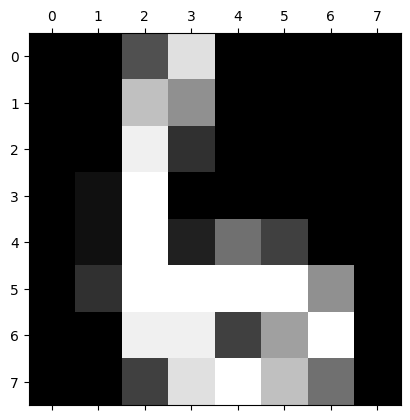

In [11]:
# Displays the digit image that we will predict.
plt.matshow(digits.images[67])

In [29]:
# Shows the Actual digit for comparison with model prediction.
print("Actual image:", int(digits.target[67]))

Actual image: 6


In [28]:
# Now our model predict truly the image is 6
print("Predicted image:", model.predict([digits.data[67]]))

Predict: [6]


In [32]:
# The actual image is (0, 1, 2, 3, 4) in dataset
print("Actual images:", digits.target[0:5])

Actual images: [0 1 2 3 4]


In [33]:
# Our model predicted correctly. predicted image is (0, 1, 2, 3, 4)
print("Predicted images:", model.predict(digits.data[0:5]))

Predicted images: [0 1 2 3 4]


In [34]:
# Model accuracy
model.score(x_test, y_test)

0.975

In [16]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(x_test)
conf_mat = confusion_matrix(y_test, y_predicted)
conf_mat

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 35,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]])

Text(95.72222222222221, 0.5, 'Truth')

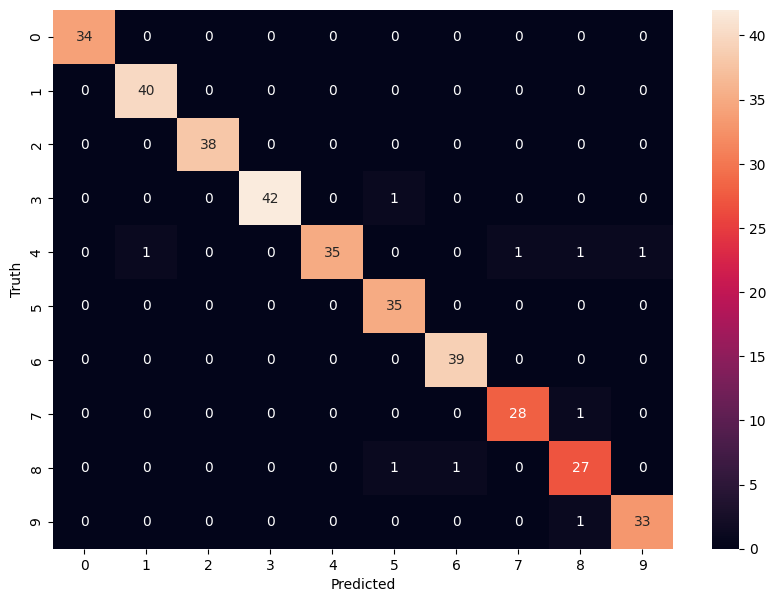

In [17]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')